In [ ]:
! pip install tensorflow==2.9.2 tensorflow-gpu==2.9.2 opencv-python mediapipe sklearn matplotlib

In [ ]:
import cv2 as cv
import numpy as np
import os
import time
from matplotlib import pyplot as plt
import mediapipe as mp

%matplotlib inline

In [6]:
cap = cv.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    cv.imshow('OpenCV Feed', frame)
    if cv.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

### Keypoints using Mediapipe Holistic

In [ ]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [ ]:
def med_detection(image, model):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image.flags.writeable = False  # image no longer writeable
    results = model.process(image) # making prediction
    image.flags.writeable = True   # image now writeable
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    return image, results

In [63]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.POSE_CONNECTIONS)

In [50]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [51]:
mp_drawing.draw_landmarks??

In [53]:
cap = cv.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret,frame = cap.read()
        
        image, results = med_detection(frame, holistic)
        # print(results)
        if results.left_hand_landmarks:
            landmark_list_pose = results.left_hand_landmarks.landmark
        
        cv.imshow('OpenCV Feed', frame)
        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

In [54]:
len(landmark_list_pose)

21

In [55]:
frame

array([[[192, 176, 179],
        [189, 172, 175],
        [188, 170, 173],
        ...,
        [127, 124, 127],
        [127, 123, 128],
        [126, 122, 127]],

       [[189, 175, 177],
        [186, 172, 174],
        [185, 170, 172],
        ...,
        [127, 124, 127],
        [128, 124, 128],
        [129, 125, 130]],

       [[183, 173, 172],
        [181, 171, 170],
        [181, 171, 170],
        ...,
        [126, 123, 125],
        [129, 126, 129],
        [131, 128, 131]],

       ...,

       [[ 59,  88, 100],
        [ 60,  89, 101],
        [ 62,  91, 103],
        ...,
        [198, 196, 196],
        [202, 200, 200],
        [204, 202, 202]],

       [[ 66,  89, 101],
        [ 67,  90, 102],
        [ 67,  90, 102],
        ...,
        [199, 197, 197],
        [202, 200, 200],
        [203, 201, 201]],

       [[ 68,  89, 101],
        [ 69,  90, 102],
        [ 69,  90, 102],
        ...,
        [199, 198, 198],
        [201, 199, 199],
        [201, 199, 199]]

In [64]:
draw_landmarks(frame, results)

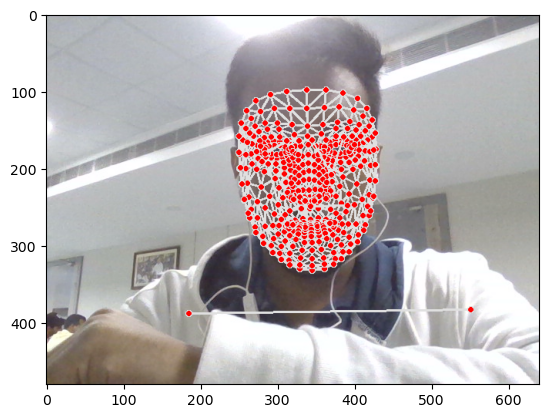

In [66]:
plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))